In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

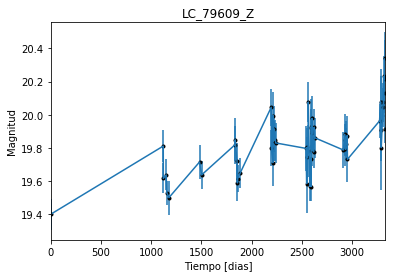

In [2]:
data = np.genfromtxt('LC_79609_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79609_Z')
plt.savefig("LC_79609_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

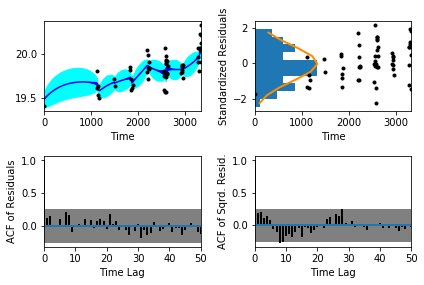

In [5]:
sample.assess_fit()

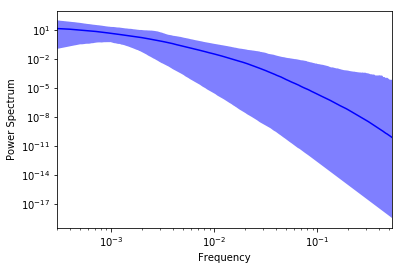

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

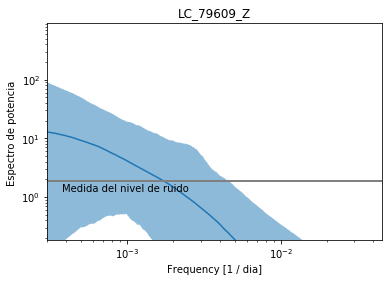

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79609_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79609_Z')

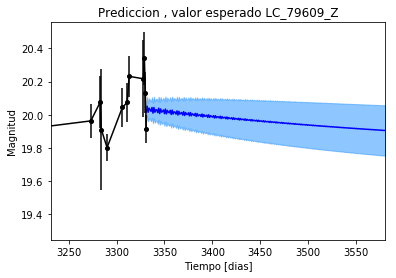

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79609_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_79609_Z')

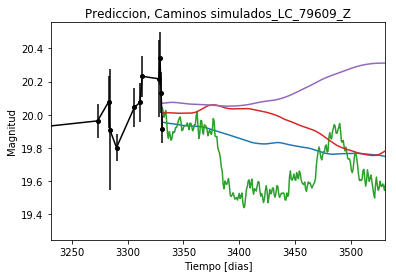

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79609_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


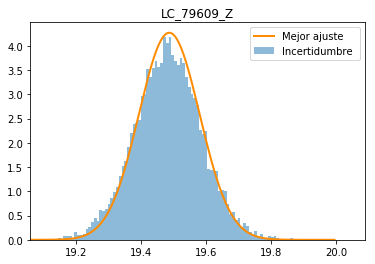

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79609_Z')
plt.savefig("Mejor_ajuste_LC_79609_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79609_Z')

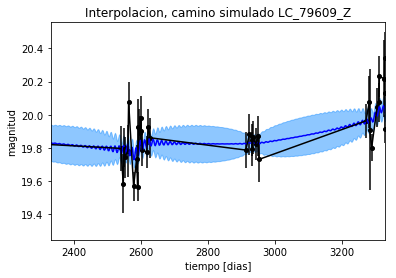

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_79609_Z')

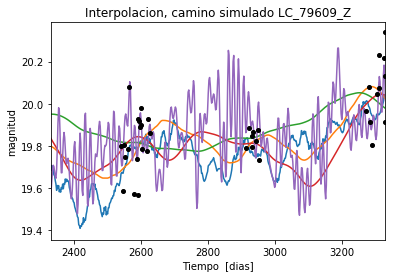

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 584.683672389
Median: 0.0102081896925
Standard deviation: 0.199429151316
68% credibility interval: [ 0.0009766   0.18358881]
95% credibility interval: [  3.62009026e-04   8.01900231e-01]
99% credibility interval: [  3.07112636e-04   1.00500674e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1066.21973654
Median: 0.00258248702517
Standard deviation: 0.0877500524324
68% credibility interval: [ 0.0004964   0.03270506]
95% credibility interval: [ 0.00031808  0.29394269]
99% credibility interval: [  3.03910659e-04   5.93288017e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 2043.84620626
Median: 0.0439766737877
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 723.335324257
Median: 55.6600154623
Standard deviation: 1.53622334412
68% credibility interval: [ 54.00443221  56.74777385]
95% credibility interval: [ 51.54258768  57.50327565]
99% credibility interval: [ 49.40718395  58.15421544]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 558.881194658
Median: 0.942472225536
Standard deviation: 2.29470418828
68% credibility interval: [ 0.08262751  4.53740866]
95% credibility interval: [ 0.01875695  7.51688497]
99% credibility interval: [  0.01111169  10.07299249]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 800.086082012
Median: 0.617274877691
Standard deviation: 10.0211820642
68% credibility interval: [  0.01958167  10.21550433]
95% credibility interval: [  6.6335168

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1642.67973689
Median: 7.68947335239e-24
Standard deviation: 5.66825195032e+150
68% credibility interval: [  2.77464332e-59   1.22566771e-01]
95% credibility interval: [  1.76416137e-087   3.70932501e+129]
99% credibility interval: [  2.56622668e-100   2.90220961e+148]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3362.36237652
Median: 19.7472840726
Standard deviation: 0.100785671803
68% credibility interval: [ 19.65745597  19.82286524]
95% credibility interval: [ 19.52419393  19.92339691]
99% credibility interval: [ 19.39854611  20.03527986]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 626.867371791
Median: 0.0179628483995
Standard deviation: 0.267655447838
68% credibility interval: [ 0.        0.414082]
95% credibility interval: [ 0.          0.95362958]
99% credibility interval: [ 0.          1.03157214]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 626.867371791
Median: 0.0179628483995
Standard deviation: 0.267655447838
68% credibility interval: [ 0.        0.414082]
95% credibility interval: [ 0.          0.95362958]
99% credibility interval: [ 0.          1.03157214]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1346.10534604
Median: 0.0
Standard deviation: 0.000891683759971
68% credibilit

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 723.335324257
Median: 55.6600154623
Standard deviation: 1.53622334412
68% credibility interval: [ 54.00443221  56.74777385]
95% credibility interval: [ 51.54258768  57.50327565]
99% credibility interval: [ 49.40718395  58.15421544]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3659.00433883
Median: 0.0350755283898
Standard deviation: 0.0500418170039
68% credibility interval: [ 0.01977794  0.06855672]
95% credibility interval: [ 0.01145669  0.14967806]
99% credibility interval: [ 0.00821075  0.30324064]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1786.42794529
Median: 1.06528808362
Standard deviation: 0.171861301761
68% credibility interval: [ 0.91512313  1.252497  ]
95% credibility interval: [ 0.78553889  1.45125261]
99% credibility interval: [ 0.70692508  1.60132992]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 660.332443719
Median: 0.000256674670945
Standard deviation: 0.340549965207
68% credibility interval: [  1.55944157e-07   3.02936960e-02]
95% credibility interval: [  3.76082958e-132   8.63167032e-001]
99% credibility interval: [  2.13777064e-151   2.44519393e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 584.683672389
Median: (-0.0641399474886-3.81001873235j)
Standard deviation: 2.09722358561
68% credibility interval: [-1.15352253+0.j         -0.00613617-2.35570096j]
95% credibility interval: [ -5.03848775e+00+0.j          -2.27456980e-03-0.00248036j]
99% credibility interval: [ -6.31464359e+00+0.j          -1.92964560e-03-0.18683206j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1066.21973654
Median: (-0.0162262445325+2.26521401137j)
Standard deviation: 1.76980177603
68% credibility interval: [-0.20549198+0.35646403j -0.00311899+0.j        ]
95% credibility interval: [-1.84689637+4.6553416j -0.00199856+0.j       ]
99% credibility interval: [ -3.72773855e+00+0.0117859j   -1.90952699e-03+0.00059853j]
Posterior summar